In [287]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score,roc_curve, auc
from sklearn.preprocessing import label_binarize
from dt import DecisionTreeClassifier
from dt import Node


# EDA

In [288]:
data = pd.read_csv("Iris.csv")
y = data['Species']
y


0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [289]:
encode_species = {'Iris-setosa': 0, 'Iris-versicolor':1,'Iris-virginica':2}
data['Species'] = data['Species'].replace(encode_species)
X = data.iloc[:, :-1]
y = data['Species']
print(y.value_counts())
data


Species
0    50
1    50
2    50
Name: count, dtype: int64


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [290]:
data.describe()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667,1.000000
std,43.445368,0.828066,0.433594,1.764420,0.763161,0.819232
min,1.000000,4.300000,2.000000,1.000000,0.100000,0.000000
25%,38.250000,5.100000,2.800000,1.600000,0.300000,0.000000
50%,75.500000,5.800000,3.000000,4.350000,1.300000,1.000000
75%,112.750000,6.400000,3.300000,5.100000,1.800000,2.000000
max,150.000000,7.900000,4.400000,6.900000,2.500000,2.000000


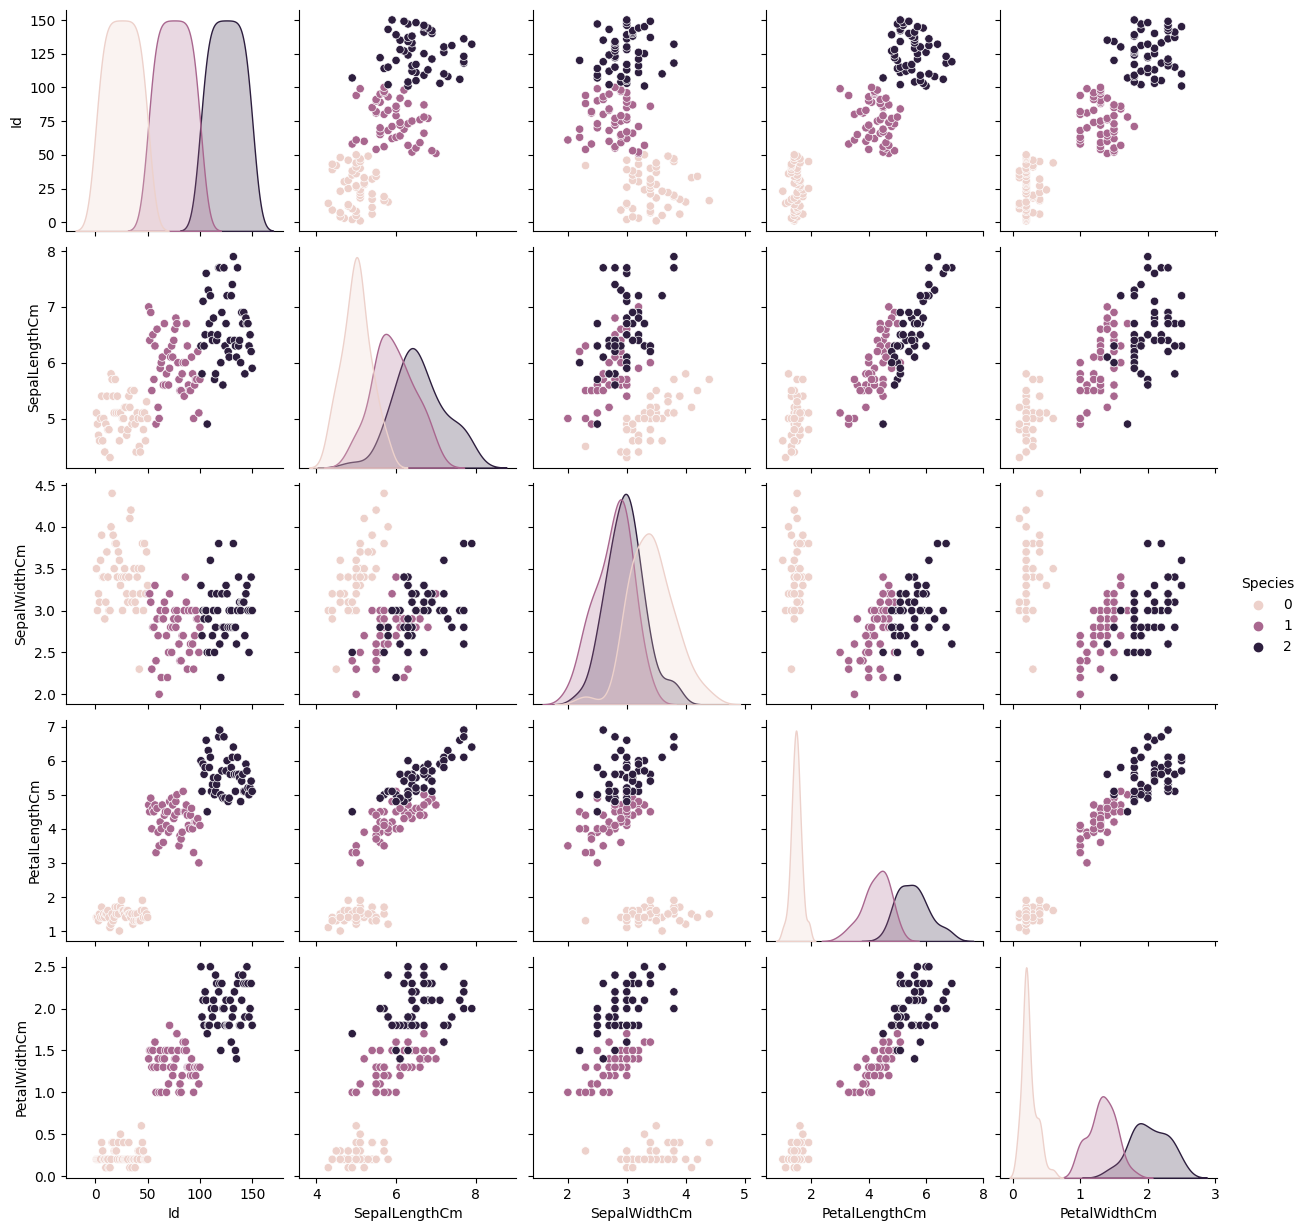

In [291]:
sns.pairplot(data, hue="Species")
plt.show()

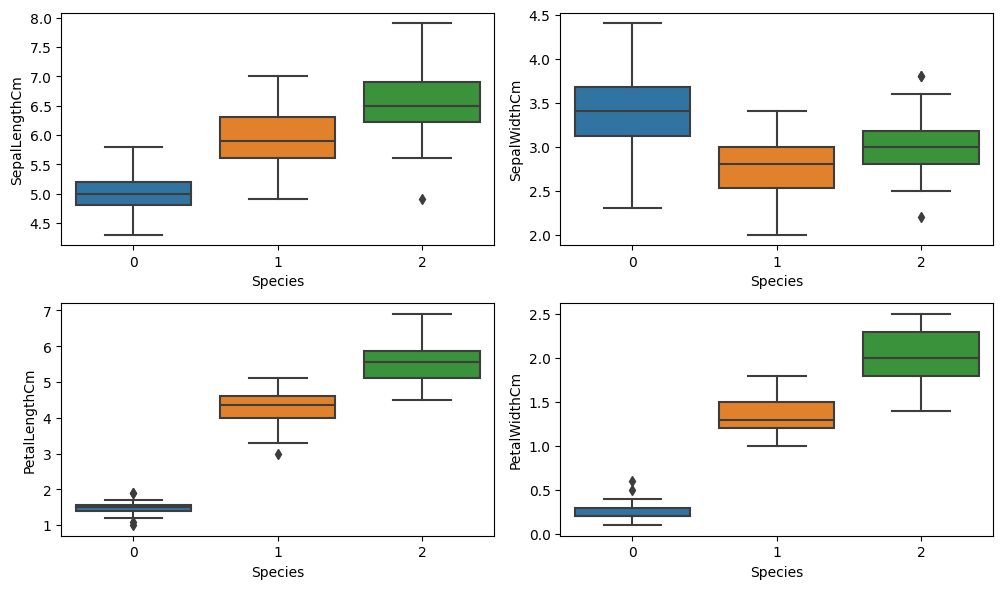

In [292]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
sns.boxplot(x="Species", y="SepalLengthCm", data=data)
plt.subplot(2, 2, 2)
sns.boxplot(x="Species", y="SepalWidthCm", data=data)
plt.subplot(2, 2, 3)
sns.boxplot(x="Species", y="PetalLengthCm", data=data)
plt.subplot(2, 2, 4)
sns.boxplot(x="Species", y="PetalWidthCm", data=data)
plt.tight_layout()
plt.show()

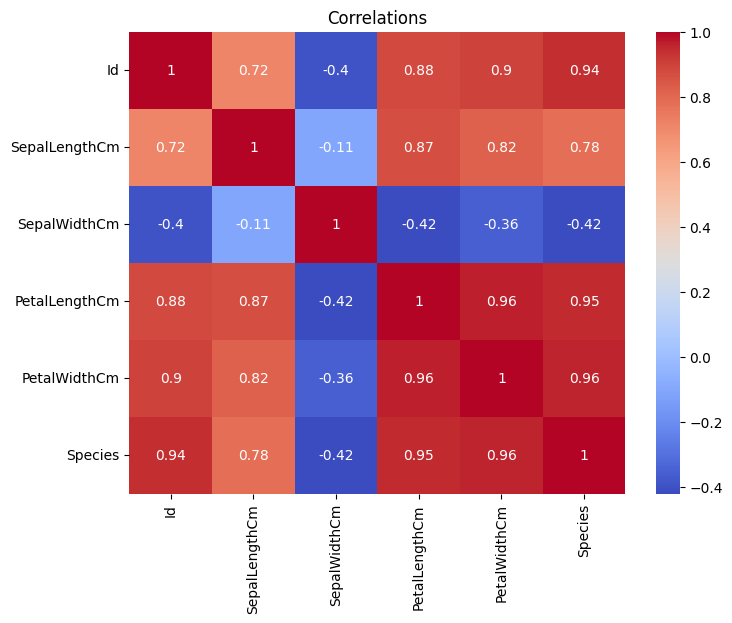

In [293]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlations")
plt.show()

In [294]:
X=data.values.tolist()
y=[]
for row in X: 
    y.append(int(row[5]))
    del row[5]
X=pd.Series(X)
y=pd.Series(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

X_train_list=X_train.values.tolist()
y_train_list=y_train.values.tolist()
X_test_list=X_test.values.tolist()
y_test_list=y_test.values.tolist()

X_train_list = [row[1:] for row in X_train_list]
X_test_list = [row[1:] for row in X_test_list]

print(X_train_list)
print(y_train_list)



[[6.7, 2.5, 5.8, 1.8], [5.7, 3.8, 1.7, 0.3], [6.4, 3.2, 5.3, 2.3], [7.7, 2.6, 6.9, 2.3], [5.8, 2.7, 4.1, 1.0], [7.7, 3.8, 6.7, 2.2], [6.4, 3.2, 4.5, 1.5], [5.6, 3.0, 4.1, 1.3], [6.4, 3.1, 5.5, 1.8], [5.8, 2.8, 5.1, 2.4], [5.0, 3.4, 1.6, 0.4], [6.3, 2.7, 4.9, 1.8], [4.9, 3.1, 1.5, 0.1], [4.9, 2.4, 3.3, 1.0], [4.6, 3.4, 1.4, 0.3], [5.5, 2.4, 3.7, 1.0], [5.7, 2.5, 5.0, 2.0], [6.4, 2.8, 5.6, 2.1], [4.8, 3.0, 1.4, 0.3], [5.0, 2.0, 3.5, 1.0], [7.3, 2.9, 6.3, 1.8], [4.6, 3.2, 1.4, 0.2], [5.4, 3.0, 4.5, 1.5], [7.6, 3.0, 6.6, 2.1], [5.5, 2.5, 4.0, 1.3], [5.9, 3.0, 5.1, 1.8], [4.4, 3.2, 1.3, 0.2], [5.3, 3.7, 1.5, 0.2], [6.1, 2.6, 5.6, 1.4], [6.7, 3.3, 5.7, 2.5], [7.2, 3.2, 6.0, 1.8], [6.6, 3.0, 4.4, 1.4], [5.8, 2.7, 5.1, 1.9], [6.7, 3.3, 5.7, 2.1], [6.4, 2.9, 4.3, 1.3], [6.8, 3.0, 5.5, 2.1], [5.0, 3.5, 1.6, 0.6], [6.3, 2.8, 5.1, 1.5], [4.4, 2.9, 1.4, 0.2], [6.3, 3.3, 6.0, 2.5], [5.7, 2.6, 3.5, 1.0], [6.0, 3.0, 4.8, 1.8], [4.6, 3.6, 1.0, 0.2], [6.6, 2.9, 4.6, 1.3], [4.8, 3.1, 1.6, 0.2], [7.2, 3.6

In [295]:
clf = DecisionTreeClassifier(max_depth=5)


### Train The Classifier

In [296]:

clf.fit(X_train_list,y_train_list)

In [297]:
yhat = clf.predict(X_test_list)
print("Test Features Expected Classification")
print(y_test_list)
print("Prediction")
print(yhat)


clf.fit(X_train_list,y_train_list)
xhat = clf.predict(X_train_list)
print("Train Features Expected Classification")
print(y_train_list)
print("Prediction")
print(xhat)

Test Features Expected Classification
[2, 2, 0, 0, 2, 0, 1, 2, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 0, 0, 1, 2, 2, 1, 0, 2]
Prediction
[2, 2, 0, 0, 2, 0, 1, 2, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 0, 0, 1, 2, 2, 1, 0, 2]
Train Features Expected Classification
[2, 0, 2, 2, 1, 2, 1, 1, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2, 0, 1, 2, 1, 2, 0, 0, 2, 2, 2, 1, 2, 2, 1, 2, 0, 2, 0, 2, 1, 2, 0, 1, 0, 2, 0, 0, 0, 2, 0, 2, 1, 1, 1, 1, 0, 0, 0, 1, 2, 1, 1, 1, 0, 0, 2, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 1, 2, 1, 0, 2, 0, 1, 2, 2, 2, 1, 1, 2, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 1, 1, 1, 0, 2, 1, 1, 0, 2, 1, 0, 1, 2, 2, 0, 0, 2]
Prediction
[2, 0, 2, 2, 1, 2, 1, 1, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2, 0, 1, 2, 1, 2, 0, 0, 2, 2, 2, 1, 2, 2, 1, 2, 0, 2, 0, 2, 1, 2, 0, 1, 0, 2, 0, 0, 0, 2, 0, 2, 1, 1, 1, 1, 0, 0, 0, 1, 2, 1, 1, 1, 0, 0, 2, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 1, 2, 1, 0, 2, 0, 1, 2, 2, 2, 1, 1, 2, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 1, 1, 1, 0, 2, 1, 1, 0, 2, 1, 0, 1, 2, 2, 0, 0, 

### RESULTS


### Accuracy

In [298]:
accuracy_score(y_test_list, yhat)

0.9666666666666667

### Confusion Matrix for Train

In [299]:

confusion_matrix_train = confusion_matrix(y_train_list, xhat)
print(confusion_matrix_train)

[[43  0  0]
 [ 0 37  0]
 [ 0  0 40]]


### Confusion Matrix for Test

In [300]:
confusion_matrix_test = confusion_matrix(y_test_list, yhat)
print(confusion_matrix_test)

[[ 7  0  0]
 [ 0 13  0]
 [ 0  1  9]]


### Precision value of Train

In [301]:
precision_train = precision_score(y_train_list, xhat, average='weighted')
print(precision_train)

1.0


### Precision value of Test

In [302]:
precision_test = precision_score(y_test_list, yhat, average='weighted')
print(precision_test)

0.9690476190476189


### Recall value of Train

In [303]:
recall_train = recall_score(y_train_list, xhat, average='weighted')
print(recall_train)

1.0


### Recall value of Test

In [304]:
recall_test = recall_score(y_test_list, yhat, average='weighted')
print(recall_test)

0.9666666666666667


### F1 Score for train

In [305]:
f1_score_train = f1_score(y_train_list, xhat, average='weighted')
print(f1_score_train)

1.0


### F1 Score for test

In [306]:
f1_score_test = f1_score(y_test_list, yhat, average='weighted')
print(f1_score_test)

0.9664067576348278


### ROC Curve

AUC for class 0: 1.00
AUC for class 1: 0.97
AUC for class 2: 0.95
AUC: 0.9735294117647059


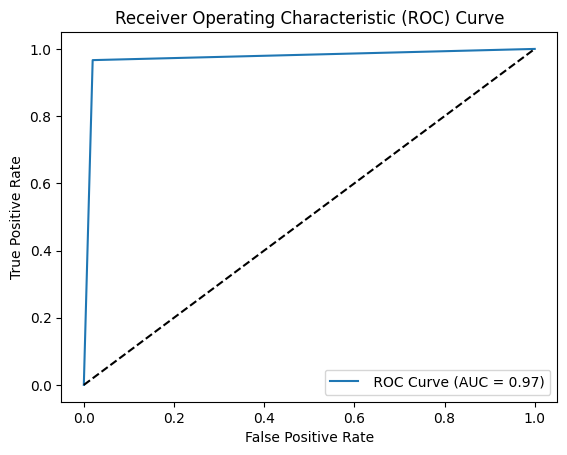

In [309]:
predicted_probabilities = clf.predict_proba(X_test_list)

y_test_array = np.array(y_test_list)
predicted_array = np.array(predicted_probabilities)

y_test_binarized = label_binarize(y_test_array, classes=[0, 1, 2])

fpr = {}
tpr = {}
roc_auc = {}
num_classes = y_test_binarized.shape[1]

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], predicted_array[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    print(f"AUC for class {i}: {roc_auc[i]:.2f}")


fpr_macro = np.mean(list(fpr.values()), axis=0)
tpr_macro = np.mean(list(tpr.values()), axis=0)
roc_auc_macro = auc(fpr_macro, tpr_macro)

print("AUC:",roc_auc_macro)

plt.plot(fpr_macro, tpr_macro, label=f' ROC Curve (AUC = {roc_auc_macro:.2f})')
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



### Calculating Area Under Curve (AUC)

#### Yorumlar: Modelim, train veri setini daha önce gördüğü için train başarımının genellikle 1.0 olması mantıklı. Testte ise önceden görmediği veriler olduğundan başarımı traine göre daha düşük (0.96). Confusion Matrixinde 30 veriden 29 unun diagonalde olduğunu yani 30da 1 yanlış yaptığını gözlemledim. Trainin Confusion Matrixinde ise 120 verinin 120si de diagonalde. Train ve Test için ayrı ayrı precision, recall, f1 score değerleri confusion matrixlerinden türetilebilir. ROC curve'e baktığımızda ise ideale yakın bir durum gözlemleyebiliriz. Modelin TP ve FP ratelerine göre ayırıcılığının 0.97 (AUC) civarında olduğunu gözlemleyebiliriz. 

### Ideal Depth

[0.9333333333333333, 0.9333333333333333, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667]


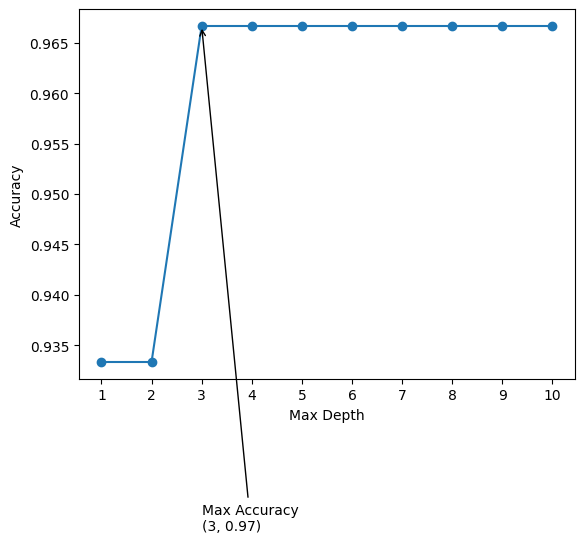

In [308]:
L =  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 

accuracy_scores = []

for idx in L:
    
    new_model = DecisionTreeClassifier(max_depth=idx)

    new_model.fit(X_train_list,y_train_list)

    preds = new_model.predict(X_test_list)

    accuracy_scores.append(accuracy_score(y_test_list, preds))

print(accuracy_scores)

max_index = accuracy_scores.index(max(accuracy_scores))

plt.plot(L, accuracy_scores, marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.xticks(L)
plt.annotate(f"Max Accuracy\n({L[max_index]}, {accuracy_scores[max_index]:.2f})",
             xy=(L[max_index], accuracy_scores[max_index]),
             xytext=(L[max_index], accuracy_scores[max_index] - 0.05),
             arrowprops=dict(arrowstyle='->'))

plt.show()

### 